In [1]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb
from scipy.stats import entropy
import sys
sys.path.append('../')
from entropyClass import EntropyAnalysis


In [2]:
DemuxEntropy = EntropyAnalysis("SeuratInput.csv")

In [6]:
DemuxEntropy.counts.head()

,ENSG00000243485,ENSG00000237613,ENSG00000186092,ENSG00000238009,ENSG00000239945,ENSG00000237683,ENSG00000239906,ENSG00000241599,ENSG00000228463,ENSG00000237094,...,ENSG00000198712,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000198786,ENSG00000198695,ENSG00000198727
AAACATACAATGCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATACATTTCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATACCAGAAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATACCAGCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATACCATGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
doubletsScore = pd.read_csv("demuxlet_calls.tsv",sep="\t")

In [5]:
doubletsScore['Call'].head()

0    DBL
1    SNG
2    SNG
3    DBL
4    SNG
Name: Call, dtype: object

In [7]:
doubletsScore['cells']  = DemuxEntropy.counts.index


Text(0.5, 1.0, 'Demuxlet PBMCs Counts Frequenncy')

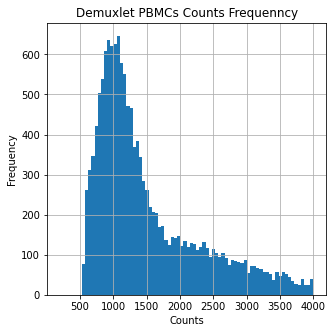

In [8]:
plt.figure(figsize=(5,5))
DemuxEntropy.counts.sum(axis=1).hist(bins=80,range=[200,4000])
plt.xlabel("Counts",fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Demuxlet PBMCs Counts Frequenncy")

In [9]:
singlets = doubletsScore[doubletsScore['Call']=='SNG']

In [10]:
doublets = doubletsScore[doubletsScore['Call']=='DBL']

In [11]:
singletsCounts = DemuxEntropy.counts.loc[singlets['Barcode'].values]

In [12]:
doubletsCounts = DemuxEntropy.counts.loc[doublets['Barcode'].values]
doubletsCounts.shape

(1565, 35635)

In [19]:
doubletsScore[doubletsScore['Call']=="AMB"].shape

(24, 4)

In [20]:
colorDict = {'DBL':'red',"SNG":'blue','AMB':'green'}

colors = [colorDict[x] for x in doubletsScore['Call'].values]

In [21]:
umaps_regressed = pd.read_csv("UMAP_embed_nCountsregressed.csv")

In [22]:
umaps_regressed.index = umaps_regressed['Unnamed: 0']

Text(0.5, 1.0, 'Demuxlet PBMCs number of counts regressed')

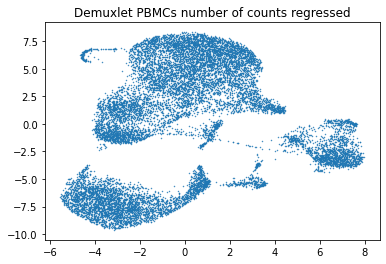

In [23]:
plt.scatter(umaps_regressed['UMAP_1'],umaps_regressed['UMAP_2'],s=0.2)
plt.title("Demuxlet PBMCs number of counts regressed")
#plt.savefig("umap_doublets_regressed.png",dpi=300)

In [25]:
umaps_regressed.index = [x.replace(".","-") for x in umaps_regressed.index]

In [ ]:
DemuxEntropy.preprocessing()
DemuxEntropy.fit_LDA(n_topics=30)

In [34]:
entropyResults = pd.DataFrame(DemuxEntropy.calculateEntropy(),index=DemuxEntropy.counts.index)

In [37]:
entropyResults.loc[doubletsScore[doubletsScore['Call']=="DBL"]['Barcode']].values.reshape(-1,).shape

(1565,)

Text(0.5, 1.0, 'Demuxlet PBMCs Counts vs Features')

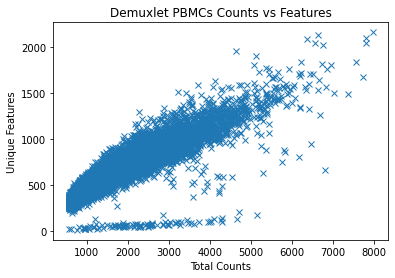

In [38]:
plt.plot(np.sum(DemuxEntropy.counts,axis=1),DemuxEntropy.counts.astype(bool).sum(axis=1),'x')
plt.xlabel("Total Counts",fontsize=10)
plt.ylabel("Unique Features",fontsize=10)
plt.title("Demuxlet PBMCs Counts vs Features")

In [39]:
metaData = pd.read_csv("metaDataDemuxletSeveralDFrates.csv")
metaData.index = metaData['Unnamed: 0']

In [40]:
metaData

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.4,seurat_clusters,pANN_0.25_0.005_1170,DF.classifications_0.25_0.005_1170,pANN_0.25_0.005_1593,DF.classifications_0.25_0.005_1593,pANN_0.25_0.005_1681,DF.classifications_0.25_0.005_1681,pANN_0.25_0.005_1827,DF.classifications_0.25_0.005_1827
Unnamed: 0,,,,,,,,,,,,,,
AAACATACAATGCC.1,AAACATACAATGCC.1,SeuratProject,2191,852,5,5,0.628866,Doublet,0.618557,Doublet,0.618557,Doublet,0.618557,Doublet
AAACATACATTTCC.1,AAACATACATTTCC.1,SeuratProject,3018,878,4,4,0.082474,Singlet,0.051546,Singlet,0.051546,Singlet,0.051546,Singlet
AAACATACCAGAAA.1,AAACATACCAGAAA.1,SeuratProject,2481,713,1,1,0.020619,Singlet,0.010309,Singlet,0.010309,Singlet,0.010309,Singlet
AAACATACCAGCTA.1,AAACATACCAGCTA.1,SeuratProject,3157,950,1,1,0.278351,Singlet,0.298969,Singlet,0.298969,Singlet,0.298969,Singlet
AAACATACCATGCA.1,AAACATACCATGCA.1,SeuratProject,703,337,6,6,0.000000,Singlet,0.010309,Singlet,0.010309,Singlet,0.010309,Singlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCATGCTTCGC.1,TTTGCATGCTTCGC.1,SeuratProject,2318,876,3,3,0.298969,Singlet,0.319588,Singlet,0.319588,Singlet,0.319588,Singlet
TTTGCATGGCAGTT.1,TTTGCATGGCAGTT.1,SeuratProject,722,332,1,1,0.000000,Singlet,0.000000,Singlet,0.000000,Singlet,0.000000,Singlet
TTTGCATGGGAACG.1,TTTGCATGGGAACG.1,SeuratProject,839,385,2,2,0.000000,Singlet,0.000000,Singlet,0.000000,Singlet,0.000000,Singlet


In [41]:
metaData['Demuxlet'] = doubletsScore['Call'].values

In [42]:
metaData['entropy'] =entropyResults[0].values

In [43]:
metaData['entropy_score'] = np.where(metaData['entropy']>=1.3, 'Doublet','Singlet')

In [91]:
subsetDBLSNG = metaData.loc[(metaData['Demuxlet']=='DBL') | (metaData['Demuxlet']=="SNG")]

In [93]:
metaData2 = metaData

In [94]:
metaData2 = metaData2.reset_index(drop=True)

In [95]:
metaData2

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.4,seurat_clusters,pANN_0.25_0.005_1170,DF.classifications_0.25_0.005_1170,pANN_0.25_0.005_1593,DF.classifications_0.25_0.005_1593,pANN_0.25_0.005_1681,DF.classifications_0.25_0.005_1681,pANN_0.25_0.005_1827,DF.classifications_0.25_0.005_1827,Demuxlet,entropy,entropy_score,colorList,UMAP1,UMAP2
0,AAACATACAATGCC.1,SeuratProject,2191,852,5,5,0.628866,Doublet,0.618557,Doublet,0.618557,Doublet,0.618557,Doublet,DBL,1.180624,Singlet,lightgrey,1.891585,4.136915
1,AAACATACATTTCC.1,SeuratProject,3018,878,4,4,0.082474,Singlet,0.051546,Singlet,0.051546,Singlet,0.051546,Singlet,SNG,1.134160,Singlet,lightgrey,-0.919105,-7.528068
2,AAACATACCAGAAA.1,SeuratProject,2481,713,1,1,0.020619,Singlet,0.010309,Singlet,0.010309,Singlet,0.010309,Singlet,SNG,0.778834,Singlet,lightgrey,-3.386255,-8.447857
3,AAACATACCAGCTA.1,SeuratProject,3157,950,1,1,0.278351,Singlet,0.298969,Singlet,0.298969,Singlet,0.298969,Singlet,DBL,1.041388,Singlet,lightgrey,-4.984726,-5.486791
4,AAACATACCATGCA.1,SeuratProject,703,337,6,6,0.000000,Singlet,0.010309,Singlet,0.010309,Singlet,0.010309,Singlet,SNG,0.565300,Singlet,lightgrey,4.452301,1.581398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,TTTGCATGCTTCGC.1,SeuratProject,2318,876,3,3,0.298969,Singlet,0.319588,Singlet,0.319588,Singlet,0.319588,Singlet,SNG,1.475727,Doublet,lightgrey,5.515422,-2.101612
14615,TTTGCATGGCAGTT.1,SeuratProject,722,332,1,1,0.000000,Singlet,0.000000,Singlet,0.000000,Singlet,0.000000,Singlet,SNG,1.077751,Singlet,lightgrey,-1.599021,-8.557801
14616,TTTGCATGGGAACG.1,SeuratProject,839,385,2,2,0.000000,Singlet,0.000000,Singlet,0.000000,Singlet,0.000000,Singlet,SNG,0.850661,Singlet,lightgrey,-3.292977,1.008675
14617,TTTGCATGGTCCTC.1,SeuratProject,1250,531,3,3,0.000000,Singlet,0.000000,Singlet,0.000000,Singlet,0.000000,Singlet,SNG,1.387384,Doublet,lightgrey,6.696798,-2.215410


In [98]:
metaData2 = metaData2[metaData2["Demuxlet"].isin(["DBL","SNG"])]

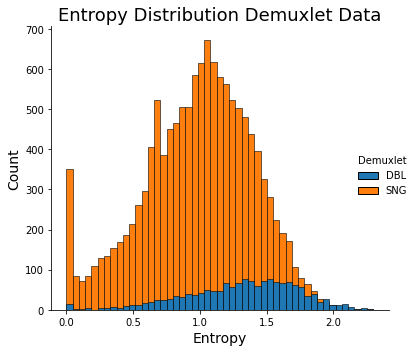

In [99]:
sb.displot(metaData2,x="entropy",hue="Demuxlet",alpha=1)
plt.title("Entropy Distribution Demuxlet Data",size=18)
plt.xlabel("Entropy",size=14)
plt.ylabel("Count",size=14)
plt.tight_layout()
#plt.savefig("thesisFigureEntropyDemuxlet.png",dpi=600)